In [1]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata
import matplotlib.pyplot as plt

In [ ]:
# task 0

df_high = pd.read_csv("/content/High.csv", index_col=0)     #.sort_index() # 2436 rows × 1257 columns
df_low = pd.read_csv("/content/Low.csv", index_col=0)       #.sort_index() # 2436 rows × 1257 columns

# set(df_high.columns == df_low.columns) # {True}

df_oneDayChange = (df_high.iloc[:, 0:-1]
                   .set_axis(df_high.columns[1:], axis='columns') 
                   / df_low.iloc[:, 1:]).round(2)

eps = 0.9
'''
for col_id in range(df_oneDayChange.shape[1]):
  if len(set(df_oneDayChange.iloc[:, col_id] < 5)) == 1:
    df_oneDayChange = df_oneDayChange.drop(df_oneDayChange.columns[col_id], axis=1)
df_oneDayChange = df_oneDayChange.loc[:, ((df_oneDayChange > 5).count(axis=1) == 0)]
'''
'''
indexes = df_oneDayChange.index
columns = df_oneDayChange.columns
len_x, len_y = df_oneDayChange.shape
for i in range(len_x):
  s = set(df_oneDayChange.iloc[i, :] > 5)
  print(df_oneDayChange.iloc[i, [df_oneDayChange.iloc[i, :] > 5]])
  if len(s) == 1 and s[0] == True:
    for j in range(len_y - 1):
      previous_day = df_oneDayChange.iloc[i][j]
      today = df_oneDayChange.iloc[i][j+1]
      if (max(previous_day, today) > 5) and (previous_day - 1 / today < eps):
        print("The asset price " + indexes[i] 
              + " has changed " + str(max(previous_day, today)) 
              + " times back and forth at " 
              + columns[j] + " to " + columns[j+1] )
      
print(df_oneDayChange.shape)
'''

mask = (df_oneDayChange > 5).values
df_oneDayChange = df_oneDayChange.where(mask)
df_oneDayChange.dropna(how='all', axis=0)
df_oneDayChange.dropna(how='all', axis=1)


,2010-01-27,2010-03-17,2010-05-06,2010-08-02,2010-08-16,2010-08-17,2010-08-18,2010-08-23,2010-09-10,2010-11-24,...,2011-12-15,2012-01-04,2012-05-03,2012-09-24,2013-01-31,2013-02-04,2013-07-16,2013-07-24,2014-03-26,2014-11-03
iba.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wpz.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flic.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ncs.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gpk.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
roic.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nbl.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
atu.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
co.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# task 1

def neutralize(x):
  x = x - np.mean(x)
  return x

# task 2

def normalize(x):
  x = x / sum(abs(x))
  return x

# task 3

def truncate(x, max_weight):
  for i in range(3):
    for j in range(len(x)):
      if abs(x[j]) > max_weight * 0.95:
        x[j] = max_weight * 0.95 * np.sign(x[j])
    x = neutralize(x)
    x = normalize(x)
  return x

# task 5

def rank(x):
  x = (rankdata(x) - 1) / (len(x) - 1)
  return x

# task 6

def cutOutliers(x, n_cut):
  for i in range(n_cut):
    x[x.argmax()], x[x.argmin()] = 0, 0
  return x

# task 7

def cutMedian(x):
  m = np.mean(x)
  eps = 0.12
  x[abs(x - m) < eps] = 0
  return x

# task 8

def applyFunction(x, func):
  x = np.apply_along_axis(func, 0, x)
  return x

# task 9

def turnover(x):  
  turn = np.sum(x - np.roll(x, 1, axis=0), axis=1)[1:] * 100
  return turn

# task 10

def drawdown(pnl):
  cum_pnl = np.cumsum(pnl)
  dd = max(((np.roll(cum_pnl, -1) - cum_pnl) / cum_pnl)[:-1])
  return dd

# task 11

def calculatePnl(returns, alphas):
  pnl = np.sum((alphas * np.roll(returns, 2, axis=1))[2:], axis=1)
  return pnl

# task 12

def calculateSharpe(pnl):
  sharpe = np.sqrt(len(pnl) - 1) * np.mean(pnl) / np.std(pnl)
  return sharpe

# task 15

def calculateCoeffPirs(x1, x2):
  coeffP = np.corrcoef(x1, x2)
  return coeffP

In [ ]:
# execute tasks 1-8 except 4

x = np.random.random(5)
print("alpha : ", x)

x = neutralize(x)
print("neutralized alpha : ", x)
x = normalize(x)
print("normalized alpha : ", x)
x_truncate = truncate(x, max_weight = 0.3)
print("truncated alpha : ", x_truncate)
x_rank = rank(x)
print("ranked alpha : ", x_rank)
x_cutOutliers = cutOutliers(np.copy(x), n_cut=1)
print("alpha without outliers : ", x_cutOutliers)
x_cutMedian = cutMedian(np.copy(x))
print("alpha without median : ", x_cutMedian)
x_applyFunction = applyFunction([1,2,3], np.square)
print("apply function to alpha : ", x_applyFunction)

# execute task 9

alphas = np.random.random([5, 5])
for i in range(len(alphas)):
  alphas[i] = normalize(neutralize(alphas[i]))
print("alphas: ", alphas)
  
t = turnover(alphas)
print("turnover = ", t)

# execute task 10

pnl = np.random.random(5)
print("pnl: ", pnl)
dd = drawdown(pnl)
print("drawdown = ", dd)

# execute task 11

returns = np.random.random([5, 5])
print("returns: ", returns)
pnl = calculatePnl(returns, alphas)
print("pnl = ", pnl)

# execute task 12

sharpe = calculateSharpe(pnl)
print("sharpe = ", sharpe)

# execute task 15

coeffP = calculateCoeffPirs(pnl, pnl)
print("correlation coefficient = ", coeffP)


alpha :  [0.91098257 0.40693095 0.30432362 0.56751061 0.32983761]
neutralized alpha :  [ 0.4070655  -0.09698612 -0.19959345  0.06359354 -0.17407946]
normalized alpha :  [ 0.43244203 -0.10303225 -0.21203614  0.06755797 -0.18493161]
truncated alpha :  [ 0.38209213 -0.08935313 -0.22178895  0.11790787 -0.18885791]
ranked alpha :  [1.   0.5  0.   0.75 0.25]
alpha without outliers :  [ 0.         -0.10303225  0.          0.06755797 -0.18493161]
alpha without median :  [ 0.285       0.         -0.21203614  0.         -0.18493161]
apply function to alpha :  [1 4 9]
alphas:  [[ 0.09233821  0.11032114 -0.34137311  0.29734066 -0.15862689]
 [ 0.24701052 -0.25633529  0.25298948 -0.21332063 -0.03034407]
 [ 0.14989304 -0.03822617  0.35010696 -0.01767798 -0.44409585]
 [-0.09964055 -0.13947408 -0.26088537  0.02786849  0.47213151]
 [ 0.11915215 -0.18295847 -0.24134298 -0.07569855  0.38084785]]
turnover =  [ 5.55111512e-15  1.11022302e-14 -5.55111512e-14  4.71844785e-14]
pnl:  [0.17718986 0.3132347  0.29

In [4]:
# task 4

def calculateReturns(closeData):
  returns = ((closeData - np.roll(closeData, 1, axis=1)) / closeData) [:, 1:]
  return returns

closeData = np.array(
    pd.read_csv("/content/Close.csv", index_col=0)
    .fillna(method="ffill", axis=1)
    .fillna(method="bfill", axis=1)
    )
returns = calculateReturns(closeData)
print(returns)

[[ 0.03034807 -0.0119348   0.00343277 ... -0.00440067 -0.00079695
  -0.00818268]
 [ 0.01035902  0.00212042 -0.01652521 ... -0.00065504 -0.01752697
  -0.00979659]
 [-0.01685399 -0.01714292  0.00218391 ...  0.0046026  -0.02461468
   0.00804381]
 ...
 [ 0.00479233  0.00582319  0.0148631  ...  0.00722979 -0.0021846
  -0.0139176 ]
 [-0.00816733  0.00268203 -0.03173681 ... -0.03030303 -0.1
   0.03225806]
 [ 0.00601382  0.00726099 -0.00405022 ... -0.00276568  0.00206996
   0.00268373]]


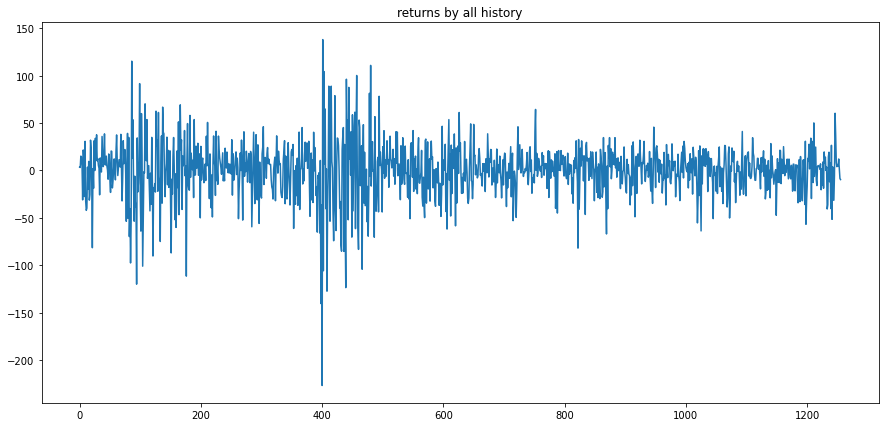

year  1
sharpe :  0.16847291917877497
turnover :  -5.494889773190854e-07
return :  87.19912749637339
drawdown =  51.06521442164899
year  2
sharpe :  -0.7522594783198876
turnover :  -1.0141284038418963e-06
return :  -511.37502921304207
drawdown =  59.83411225947169
year  3
sharpe :  0.3574236620893105
turnover :  -1.5380690439295843e-06
return :  125.63214991210407
drawdown =  39.13350398512303
year  4
sharpe :  1.0670126017259267
turnover :  -3.565524137933421e-06
return :  309.44235077315625
drawdown =  3.543333451835446
year  5
sharpe :  -0.8656458096755474
turnover :  -5.813773092727844e-06
return :  -266.5244260723757
drawdown =  1.8031488412419174


In [18]:
# task 14

import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 7.0)

def splitByYear(x):
  x = np.sum(x, axis=0)
  n_days = len(x)
  if n_days % 252:
    x = np.reshape(
        np.concatenate((x, np.zeros(252 - n_days % 252))), 
        (n_days // 252 + 1, 252)
        )
  else:
    x = np.reshape(x, (n_days // 252, 252))
  return x

def alphaStats(closeData):
  returns = calculateReturns(closeData)
  plt.plot(np.array([i for i in range(returns.shape[1])]), np.sum(returns, axis=0))
  plt.title('returns by all history')
  plt.show()

  returns = splitByYear(returns)

  for i in range(len(returns)):
    print("year ", i+1)
    print("sharpe : ", calculateSharpe(returns[i]))
    print("turnover : ", np.mean(turnover(normalize(neutralize(closeData[:, i*252:(i+1)*252-1])))))
    print("return : ", sum(returns[i]))
    print("drawdown = ", drawdown(returns[i]))

alphaStats(closeData)